Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving kisspng-anger-management-hostility-old-man-5ab902cf155a17.6107647215220743190875.jpg to kisspng-anger-management-hostility-old-man-5ab902cf155a17.6107647215220743190875 (2).jpg
Imaginea încărcată:


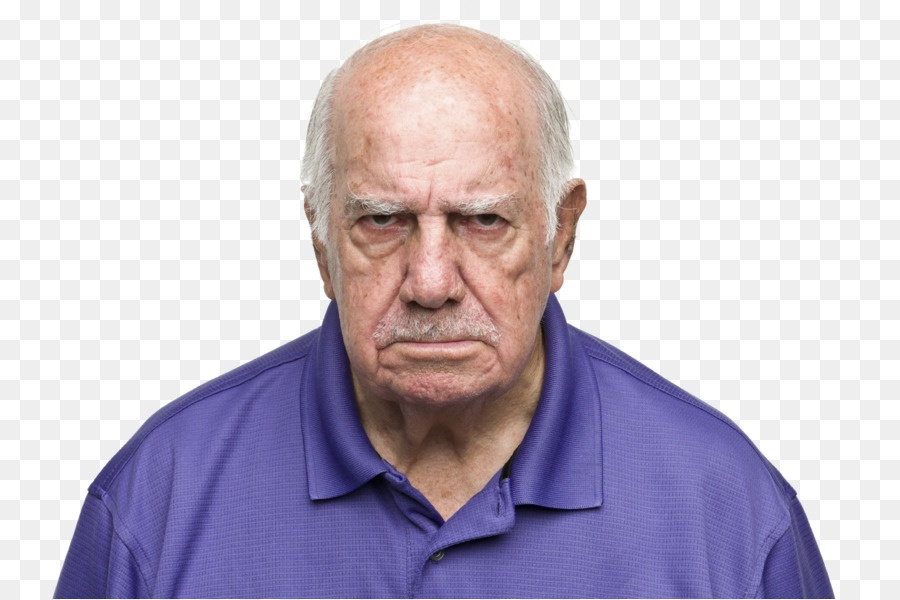

1/1 [==============================] - 0s 92ms/step
Emoția prezisă este: fear


In [11]:
# Vom apela proiectul salvat si il vom testa aici. Dupa rulare se poate incarca o poza JPG cu o persoana iar ca output se va afisa emotia de pe expresia faciala a persoanei. (Fata trebuie sa fie vizibila in totalitate)


from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf


model_path = '/content/drive/My Drive/emotion_detection_model.h5'
model = tf.keras.models.load_model(model_path)


from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from IPython.display import Image, display
import numpy as np


uploaded = files.upload()


if len(uploaded.keys()) != 1:
  print("Vă rugăm să încărcați exact o imagine.")
else:
  filename = next(iter(uploaded))


  print("Imaginea încărcată:")
  display(Image(filename=filename))


  img = load_img(filename, color_mode='grayscale', target_size=(48, 48))
  img_array = img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0


  predictions = model.predict(img_array)

  emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
  predicted_emotion = emotion_labels[np.argmax(predictions)]
  print("Emoția prezisă este:", predicted_emotion)
